## A Preliminary analysis of the geograhpical distribution of US banks in 2019

### Understanding and Prepossessing the data: 2. Details of three entities (Banking Institutions)

In [34]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from IPython.display import Image

Apart from the previous two functions (is_primary_key and add_occurence_to), I have also compiled a function that converts string column to numerics.

In [35]:
# verify if varname is a primary key of df
def is_primay_key(df, varname):
    
    # the number of primary keys should match the number of records
    flag = len(df[varname].unique()) == df.shape[0]
    
    return(flag)

# count the occurence of varname in df and add it as a column in df
def add_occurence_to(df, varname):
    
    # frequency of varname in df
    freq = df[varname].value_counts().to_frame()
    freq.reset_index(level = 0, inplace = True)
    freq.columns = [varname, 'freq']
    
    df = pd.merge(df, freq, how = 'left', on = varname)
    
    return(df)

def strcol2num(df, varname):
    
    for v in varname:  
        df[v] = df[v].str.replace(',' ,'').astype('float')
        
    return(df)

In [36]:
# Set the working directory
os.chdir('bank_geo\\data')

# Read the data and the metadata file
ins_raw = pd.read_csv('ins_raw.csv', encoding = "ISO-8859-1")

#### Understanding the institute data

Similarly, we repeat same steps in HCR data as in the institute data:

In [37]:
ins_raw.head()

,Unnamed: 0,ADDRESS,ASSET,BKCLASS,CALL,CERT,CHARTER,CHRTAGNN,CHRTAGNT,CITY,CLCODE,CNTRYNA,DENOVO,DEPDOM,DEPSUM,DOCKET,ESCROW,FDICDBS,FDICNAME,FED,FEDNAME,INSAGNT1,INSBRDD,INSBRTS,INSURED,NAMEFULL,OCCDIST,OCCNAME,REGAGNT,RSSDID,SPECDESC,SPECGRP,STALP,STCNTY,STNAME,UNIT,USA,ZIP
0,0,1 Lincoln St. Fl 1,"238,122,000",SM,CALL,14,STATE,State Agency,STATE,Boston,13,United States,0.0,"107,288,000","107,288,000",14278,NaN,2,New York,1,Boston,DIF,NaN,NaN,CB,State Street Bank and Trust Company,1,Northeast District,FED,35301,INTERNATIONAL,1,MA,25025,Massachusetts,0.0,1,2111
1,1,1 Lincoln St. Fl 1,"238,122,000",SM,CALL,14,STATE,State Agency,STATE,Boston,13,United States,0.0,"107,288,000",0,14278,NaN,2,New York,1,Boston,DIF,NaN,NaN,CB,State Street Bank and Trust Company,1,Northeast District,FED,35301,INTERNATIONAL,1,MA,25025,Massachusetts,0.0,1,2111
2,3,100 North Gay Street,"840,083",SM,CALL,35,STATE,State Agency,STATE,Auburn,13,United States,0.0,"742,860","742,860",9177,NaN,5,Atlanta,6,Atlanta,DIF,NaN,NaN,CB,AuburnBank,5,Southwest District,FED,749635,COMMERCIAL LENDING,4,AL,1081,Alabama,0.0,1,36830
3,4,100 North Gay Street,"840,083",SM,CALL,35,STATE,State Agency,STATE,Auburn,13,United States,0.0,"742,860",0,9177,NaN,5,Atlanta,6,Atlanta,DIF,NaN,NaN,CB,AuburnBank,5,Southwest District,FED,749635,COMMERCIAL LENDING,4,AL,1081,Alabama,0.0,1,36830
4,11,216 North Walnut Avenue,"324,549",NM,CALL,39,STATE,State Agency,STATE,Demopolis,21,United States,0.0,"278,014",0,14095,NaN,5,Atlanta,6,Atlanta,DIF,NaN,NaN,CB,Robertson Banking Company,5,Southwest District,FDIC,430036,COMMERCIAL LENDING,4,AL,1091,Alabama,0.0,1,36732


In [38]:
# cleaning the HCR data
print('1. Is RSSDID the primary key of hcr_raw?')
is_primay_key(ins_raw, 'RSSDID')

1. Is RSSDID the primary key of hcr_raw?


False

In [39]:
# Some of the replicates in RSSDID looks like this
pd.set_option('display.max_columns', None)
temp = add_occurence_to(ins_raw, 'RSSDID')
temp[temp['freq'] > 1].sort_values('RSSDID').head()

,Unnamed: 0,ADDRESS,ASSET,BKCLASS,CALL,CERT,CHARTER,CHRTAGNN,CHRTAGNT,CITY,CLCODE,CNTRYNA,DENOVO,DEPDOM,DEPSUM,DOCKET,ESCROW,FDICDBS,FDICNAME,FED,FEDNAME,INSAGNT1,INSBRDD,INSBRTS,INSURED,NAMEFULL,OCCDIST,OCCNAME,REGAGNT,RSSDID,SPECDESC,SPECGRP,STALP,STCNTY,STNAME,UNIT,USA,ZIP,freq
1186,24409,260 Front Street,"42,778",SM,CALL,3850,STATE,State Agency,STATE,Xenia,13,United States,0.0,"34,081","34,081",12627,NaN,9,Chicago,8,St. Louis,DIF,NaN,NaN,CB,"First Community Bank, Xenia-Flora",3,Central District,FED,242,AGRICULTURAL,2,IL,17025,Illinois,0.0,1,62899,2
1185,24408,260 Front Street,"42,778",SM,CALL,3850,STATE,State Agency,STATE,Xenia,13,United States,0.0,"34,081",0,12627,NaN,9,Chicago,8,St. Louis,DIF,NaN,NaN,CB,"First Community Bank, Xenia-Flora",3,Central District,FED,242,AGRICULTURAL,2,IL,17025,Illinois,0.0,1,62899,2
7212,74111,215 West Broad,"261,498",SB,CALL,28868,STATE,State Agency,STATE,Mineola,41,United States,0.0,"205,211",0,2523,NaN,13,Dallas,11,Dallas,DIF,NaN,NaN,SA,"Mineola Community Bank, S.S.B.",5,Southwest District,FDIC,279,MORTGAGE LENDING,5,TX,48499,Texas,0.0,1,75773,2
7213,74112,215 West Broad,"261,498",SB,CALL,28868,STATE,State Agency,STATE,Mineola,41,United States,0.0,"205,211","205,211",2523,NaN,13,Dallas,11,Dallas,DIF,NaN,NaN,SA,"Mineola Community Bank, S.S.B.",5,Southwest District,FDIC,279,MORTGAGE LENDING,5,TX,48499,Texas,0.0,1,75773,2
2063,37986,87 Front Street,"549,782",N,CALL,6959,FED,Comptroller of the Currency,OCC,Ballston Spa,3,United States,0.0,"449,729","449,729",13519,NaN,2,New York,2,New York,DIF,NaN,NaN,CB,Ballston Spa National Bank,1,Northeast District,OCC,505,COMMERCIAL LENDING,4,NY,36091,New York,0.0,1,12020,2


I have found that for each of the RSSDID, one duplicate with depsum of 0 is created. I am wondering whether RSSDID becomes the primary key once the zero depsum records are removed.

In [40]:
ins_cleaned = temp
ins_cleaned.drop(ins_cleaned[(ins_cleaned.DEPSUM == '0') & (ins_cleaned.freq > 1)].index, inplace = True)
ins_cleaned.drop(['freq'], axis = 1, inplace = True)
print('2. After removal of 0 depsum, is RSSDID the primary key of ins_raw?')
is_primay_key(ins_cleaned, 'RSSDID')

2. After removal of 0 depsum, is RSSDID the primary key of ins_raw?


True

#### An visual of banking institutes by specifications

In [41]:
# Clean all the string columns
li = ['DEPSUM' ,'DEPDOM', 'ASSET']

ins_cleaned = strcol2num(ins_cleaned, li)

In [88]:
# Summarize by SPECDESC
spec = ins_cleaned.groupby('SPECDESC').agg(freq = ('SPECDESC', 'count'), 
                                   mean_dep = ('DEPSUM', 'mean'), 
                                   std_dep = ('DEPSUM', 'std'), 
                                   mean_ast = ('ASSET', 'mean'), 
                                   std_ast = ('ASSET', 'std'))

spec.reset_index(level = 0, inplace = True)
spec['perc_freq'] = spec['freq']/spec['freq'].sum() * 100
spec

,SPECDESC,freq,mean_dep,std_dep,mean_ast,std_ast,perc_freq
0,AGRICULTURAL,1329,1.800472e+05,3.715180e+05,2.190547e+05,4.830299e+05,25.014116
1,ALL OTHER < $1 BILLION,426,1.482443e+05,1.340335e+05,1.775569e+05,1.610157e+05,8.018069
2,ALL OTHER > $1 BILLION,54,8.116659e+07,2.565024e+08,1.057233e+08,3.383130e+08,1.016375
3,COMMERCIAL LENDING,2808,1.833721e+06,1.003674e+07,2.371440e+06,1.359666e+07,52.851496
4,CONSUMER LENDING,70,2.613549e+06,1.095923e+07,3.176849e+06,1.274740e+07,1.317523
5,CREDIT-CARD,11,3.124801e+07,3.352298e+07,4.736057e+07,5.132008e+07,0.207039
6,INTERNATIONAL,5,4.247120e+08,5.315946e+08,8.977615e+08,9.765444e+08,0.094109
7,MORTGAGE LENDING,388,7.069910e+05,2.877946e+06,9.163490e+05,3.690551e+06,7.302842
8,NO GROUP,1,0.000000e+00,NaN,0.000000e+00,NaN,0.018822
9,OTHER < $1 BILLION,221,1.344114e+05,1.514267e+05,1.706623e+05,1.806164e+05,4.159609


In [162]:
spec = spec[spec['freq'] != 'NO GROUP']

fig = make_subplots(rows = 2, cols = 3, specs=[[{"type": "bar"}, {"type": "pie"}, {"rowspan": 2, "type": "scatter"}], 
                                               [{"type": "box"}, {"type": "bar"}, None]],
                   subplot_titles=("Fig 1.1: Bank numbers","Fig 1.2. Bank numbers in percentage",
                                   "Fig 1.3: dep versus assets", "Fig 1.4: Mean assets", 
                                   "Fig 1.5: Mean deposits"))

fig.add_trace(go.Bar(x = spec['SPECDESC'], y = spec['freq'], text = spec['freq'],textposition = 'auto'), 1, 1)
fig.add_trace(go.Pie(labels = list(spec['SPECDESC']), values = list(spec['perc_freq']), textposition='inside'), 1, 2)
fig.add_trace(go.Scatter(x = spec['mean_ast'], y = spec['mean_dep'], mode='markers', marker_size = spec['freq']/30), 1, 3)
fig.add_trace(go.Bar(x = spec['SPECDESC'], y = spec['mean_dep'], error_y=dict(type='data', array = spec['std_dep'])), 2, 1)
fig.add_trace(go.Bar(x = spec['SPECDESC'], y = spec['mean_ast'], error_y=dict(type='data', array = spec['std_ast'])), 2, 2)

fig.update_layout(font=dict(size=5, color="#7f7f7f"), title_text = 'Fig 1. Visuals of Bank Specialty')
fig.show()

The above figure presents the distribution of banks with different specilizations. We see from Fig 1.1 and 1.2, the agriculture and commerical lending banks take up the majority. From fig 1.4 and 1.5, we find International banks have extremely large deposits and assets, which can also be seen from Fig 1.3.

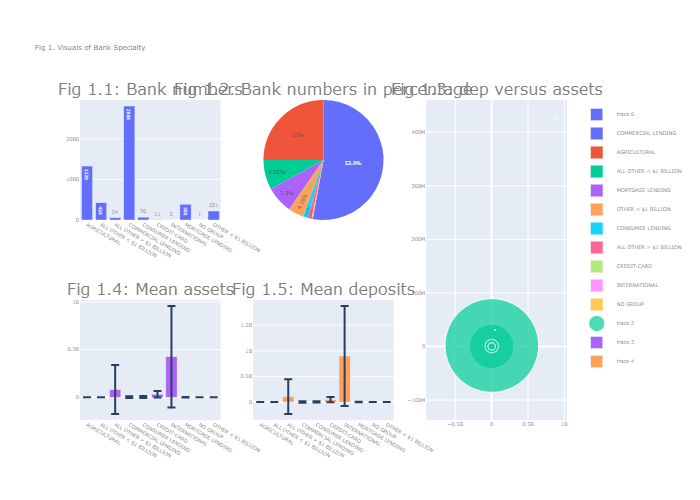

In [163]:
fig.write_image("bank_geo/P2_INS1.png")
Image(filename = 'bank_geo/P2_INS1.png')

The later visuals focus on two major categories: Agriculture and commerical lending. Both Banks have very skewed distribution in deposits/assets (see Fig 2.1 and Fig 2.3). As for Agriculture banks, the banks seemed to be more concentrated in Midwest (in terms of numbers. And for the commerical lending banks, the Midwest, South and Northeast seemed to be major footprints.

In [164]:
temp = ins_cleaned[ins_cleaned['SPECDESC'].isin(['AGRICULTURAL', 'COMMERCIAL LENDING'])]

ag_state = temp[temp['SPECDESC'] == 'AGRICULTURAL']['STALP'].value_counts().to_frame()
ag_state.reset_index(level = 0, inplace = True)
ag_state.columns = ['state', 'freq']
cm_state = temp[temp['SPECDESC'] == 'COMMERCIAL LENDING']['STALP'].value_counts().to_frame()
cm_state.reset_index(level = 0, inplace = True)
cm_state.columns = ['state', 'freq']

fig = make_subplots(rows = 2, cols = 2, specs=[[{"type": "bar"}, {"type": "choropleth"}], 
                                              [{"type": "box"}, {"type": "choropleth"}]],
                   subplot_titles=("Fig 2.1: Dist of assets/dep (AG)","Fig 2.2. Geo Dist (AG)",
                                   "Fig 2.3: Dist of assets/dep (CM)", "Fig 2.4. Geo Dist (CM)"))

hist1 = go.Figure()
hist1.add_trace(go.Histogram(x = temp[temp['SPECDESC'] == 'AGRICULTURAL']['DEPSUM']))
hist1.add_trace(go.Histogram(x = temp[temp['SPECDESC'] == 'AGRICULTURAL']['ASSET']))
hist1.update_layout(barmode='stack')
hist1.update_traces(opacity = 0.75)

hist2 = go.Figure()
hist2.add_trace(go.Histogram(x = temp[temp['SPECDESC'] == 'COMMERCIAL LENDING']['DEPSUM']))
hist2.add_trace(go.Histogram(x = temp[temp['SPECDESC'] == 'COMMERCIAL LENDING']['ASSET']))
hist2.update_layout(barmode='stack')
hist2.update_traces(opacity = 0.75)

fig.append_trace(hist1['data'][0], 1, 1)
fig.append_trace(hist2['data'][0], 2, 1)

map1 = px.choropleth(locations = ag_state['state'], color = ag_state['freq'], locationmode = 'USA-states', scope = "usa")
map2 = px.choropleth(locations = cm_state['state'], color = cm_state['freq'], locationmode = 'USA-states', scope = "usa")

fig.append_trace(map1['data'][0], 1, 2)
fig.append_trace(map2['data'][0], 2, 2)

fig['layout']['geo']['scope'] = 'usa'
fig['layout']['geo2']['scope'] = 'usa'
fig.update_layout(legend_orientation="h")

fig.show()

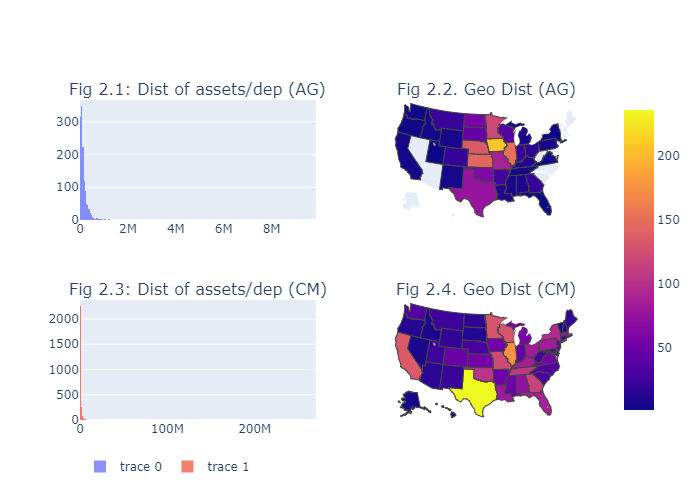

In [165]:
fig.write_image("bank_geo/P2_INS2.png")
Image(filename = 'bank_geo/P2_INS2.png')